In [ ]:
%%bash
pip install --no-cache-dir -q pip wheel
pip install --no-cache-dir -q numpy==1.23.0 pandas matplotlib seaborn scikit-learn
pip install --no-cache-dir -q tensorflow pydot
pip check

In [ ]:
import os
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set(font="DejaVu Sans")

from sklearn.model_selection import train_test_split

import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.get_logger().setLevel('ERROR')

# The Keras functional API

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv1D(filters=16, kernel_size=5,
#         activation='relu', input_shape=(32, 1)),
#     tf.keras.layers.AveragePooling1D(pool_size=3),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=20, activation='sigmoid')
# ])

inputs = tf.keras.Input(shape=(32, 1))
h = tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation="relu")(inputs)
h = tf.keras.layers.AveragePooling1D(pool_size=3)(h)
h = tf.keras.layers.Flatten()(h)
outputs = tf.keras.layers.Dense(units=20, activation="sigmoid")(h)

model = tf.keras.Model(
    inputs=inputs, outputs=outputs
)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)
history = model.fit(x=X_train, y=y_train,
    validation_data=[X_Val, y_val], epochs=20,
    verbose=0
)
test_loss, test_acc = model.evaluate(
    x=X_test, y=y_test,
    verbose=0
)
preds = model.predict(
    x=X_sample,
    verbose=0
)

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [ ]:
inputs = tf.keras.Input(shape=(32, 1))
h = tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation="relu")(inputs)
h = tf.keras.layers.AveragePooling1D(pool_size=3)(h)
h = tf.keras.layers.Flatten()(h)
aux_inputs = tf.keras.Input(shape=(12,))
h = tf.keras.layers.Concatenate()([h, aux_inputs])
outputs = tf.keras.layers.Dense(units=20, activation="sigmoid")(h)
aux_outputs = tf.keras.layers.Dense(units=1, activation="linear")(h)

model = tf.keras.Model(
    inputs=[inputs, aux_inputs],
    outputs=[outputs, aux_outputs]
)
model.compile(
    loss=[tf.keras.losses.BinaryCrossentropy(),
        tf.keras.losses.MeanSquareError()],
    loss_weights=[1, 0.4],
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)
history = model.fit(
    x=[X_train, X_aux], y=[y_train, y_aux],
    validation_split=0.2,
    epochs=20, verbose=0
)

In [ ]:
inputs = tf.keras.Input(shape=(32, 1), name="inputs")
h = tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation="relu")(inputs)
h = tf.keras.layers.AveragePooling1D(pool_size=3)(h)
h = tf.keras.layers.Flatten()(h)
aux_inputs = tf.keras.Input(shape=(12,), name="aux_inputs")
h = tf.keras.layers.Concatenate()([h, aux_inputs])
outputs = tf.keras.layers.Dense(units=20, activation="sigmoid", name="outputs")(h)
aux_outputs = tf.keras.layers.Dense(units=1, activation="linear", name="aux_outputs")(h)

model = tf.keras.Model(
    inputs=[inputs, aux_inputs],
    outputs=[outputs, aux_outputs]
)
model.compile(
    loss={"outputs": tf.keras.losses.BinaryCrossentropy(),
        "aux_outputs": tf.keras.losses.MeanSquareError()},
    loss_weights={"outputs": 1, "aux_outputs": 0.4},
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)
history = model.fit(
    x={"inputs": X_train, "aux_inputs": X_aux},
    y={"outputs": y_train, "aux_outputs": y_aux},
    validation_split=0.2, epochs=20
)

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Load the data

In [2]:
os.makedirs("./data", exist_ok=True)

In [3]:
# Load the dataset

pd_dat = pd.read_csv("./data/diagnosis.csv")
dataset = pd_dat.values

dataset[:5, :]

array([[35.5,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [35.9,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [35.9,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36. ,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [4]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(
    dataset[:, :6], dataset[:, 6:], test_size=0.33)
print(f"X_train shape: {X_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (80, 6)
Y_test shape: (40, 2)


In [5]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = \
    np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = \
    np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

print(f"temp_train shape: {temp_train.shape}")
print(f"nephr_test shape: {nephr_test.shape}")

temp_train shape: (80,)
nephr_test shape: (40,)


#### Build the model

In [6]:
# Build the input layers

shape_inputs = (1, )
temperature = tf.keras.Input(shape=shape_inputs, name="temp")
nausea_occurence = tf.keras.Input(shape=shape_inputs, name="nocc")
lumbar_pain = tf.keras.Input(shape=shape_inputs, name="lumbp")
urine_pushing = tf.keras.Input(shape=shape_inputs, name="up")
micturition_pains = tf.keras.Input(shape=shape_inputs, name="mict")
bis = tf.keras.Input(shape=shape_inputs, name="bis")

In [7]:
# Create a list of all the inputs

list_inputs = [
    temperature, nausea_occurence, lumbar_pain, 
    urine_pushing, micturition_pains, bis
]

In [8]:
# Merge all input features into a single large vector

x = tf.keras.layers.concatenate(list_inputs)

In [ ]:
# Use a logistic regression classifier for disease prediction

inflammation_pred = tf.keras.layers.Dense(
    units=1, activation="sigmoid", name="inflam")(x)
nephritis_pred = tf.keras.layers.Dense(
    units=1, activation="sigmoid", name="nephr")(x)

In [10]:
# Create a list of all the outputs

list_outputs = [
    inflammation_pred, nephritis_pred
]

#### Build and Compile the model

In [11]:
# Create & compile the model object

model = tf.keras.Model(
    inputs=list_inputs,
    outputs=list_outputs
)
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
    loss={"inflam": tf.keras.losses.BinaryCrossentropy(), 
        "nephr": tf.keras.losses.BinaryCrossentropy()},
    metrics={"inflam": [tf.keras.metrics.BinaryAccuracy()],
        "nephr": [tf.keras.metrics.BinaryAccuracy()]},
    loss_weights=[1., 0.2]
)

#### Plot the model

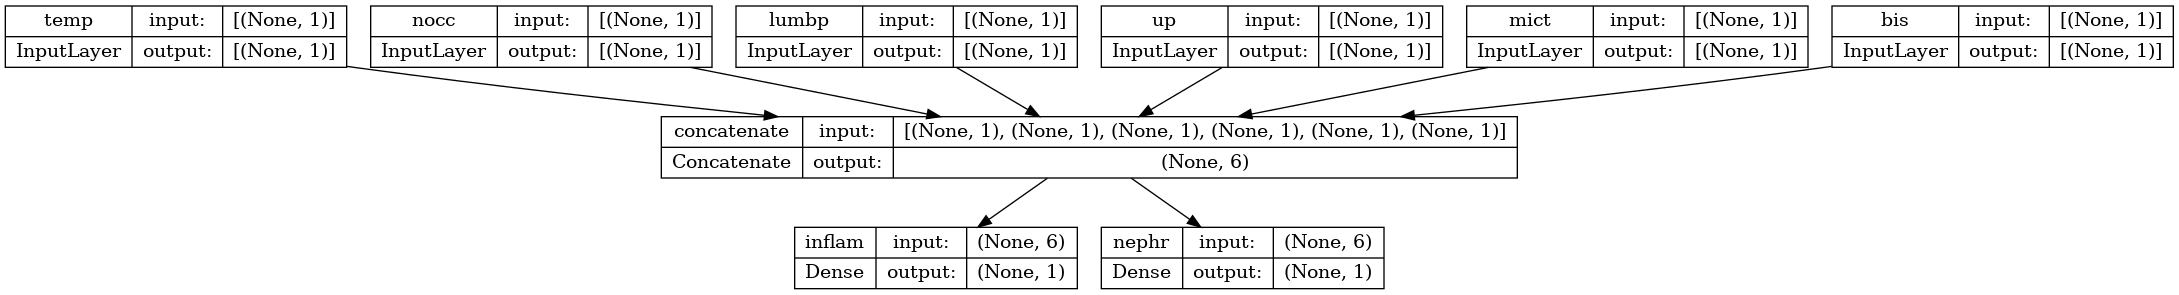

In [14]:
# Display the multiple input/output model
tf.keras.utils.plot_model(
    model=model, 
    to_file='multi_input_output_model.png',
    show_shapes=True
)

#### Fit the model 

In [15]:
# Define training inputs and outputs

# inputs_train = [temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train]
# outputs_train = [inflam_train, nephr_train]

inputs_train = {
    "temp": temp_train, "nocc": nocc_train, "lumbp": lumbp_train,
    "up": up_train, "mict": mict_train, "bis": bis_train
}

outputs_train = {
    "inflam": inflam_train, "nephr": nephr_train
}

In [ ]:
# Train the model
history = model.fit(x=inputs_train, y=outputs_train,
    epochs=1000, batch_size=128, verbose=0)

#### Plot the learning curves

In [17]:
class PlotHistory():
    plt_nrows = 1
    plt_ncols = 2
    plt_figsize = (15, 5)
    
    def __init__(self, history, metrics=['loss']):
        super().__init__()
        self.history = history
        self.metrics = metrics
        
    @classmethod
    def _create_plot(cls):
        return plt.subplots(nrows=cls.plt_nrows,
            ncols=cls.plt_ncols, figsize=cls.plt_figsize)
    
    def plot(self):
        df_history = pd.DataFrame(self.history.history,
            index=self.history.epoch)
        fig, axes = self._create_plot()
        for ax, key in zip(axes, self.metrics):
            metrics = [s for s in self.history.history.keys() if key in s]
            for m in metrics:
                sns.lineplot(ax=ax, data=df_history,
                    x=df_history.index+1, y=m, label=f'train_{m}')
                try:
                    sns.lineplot(ax=ax, data=df_history,
                        x=df_history.index+1, y=f'val_{m}', label=f'valid_{m}')
                except Exception:
                    pass
                ax.legend(loc='best')
                ax.set_xlabel('epoch')
                ax.set_ylabel(f'{key}')
                ax.set_title(f'{key} vs. epoch')
        fig.tight_layout()
        plt.show()

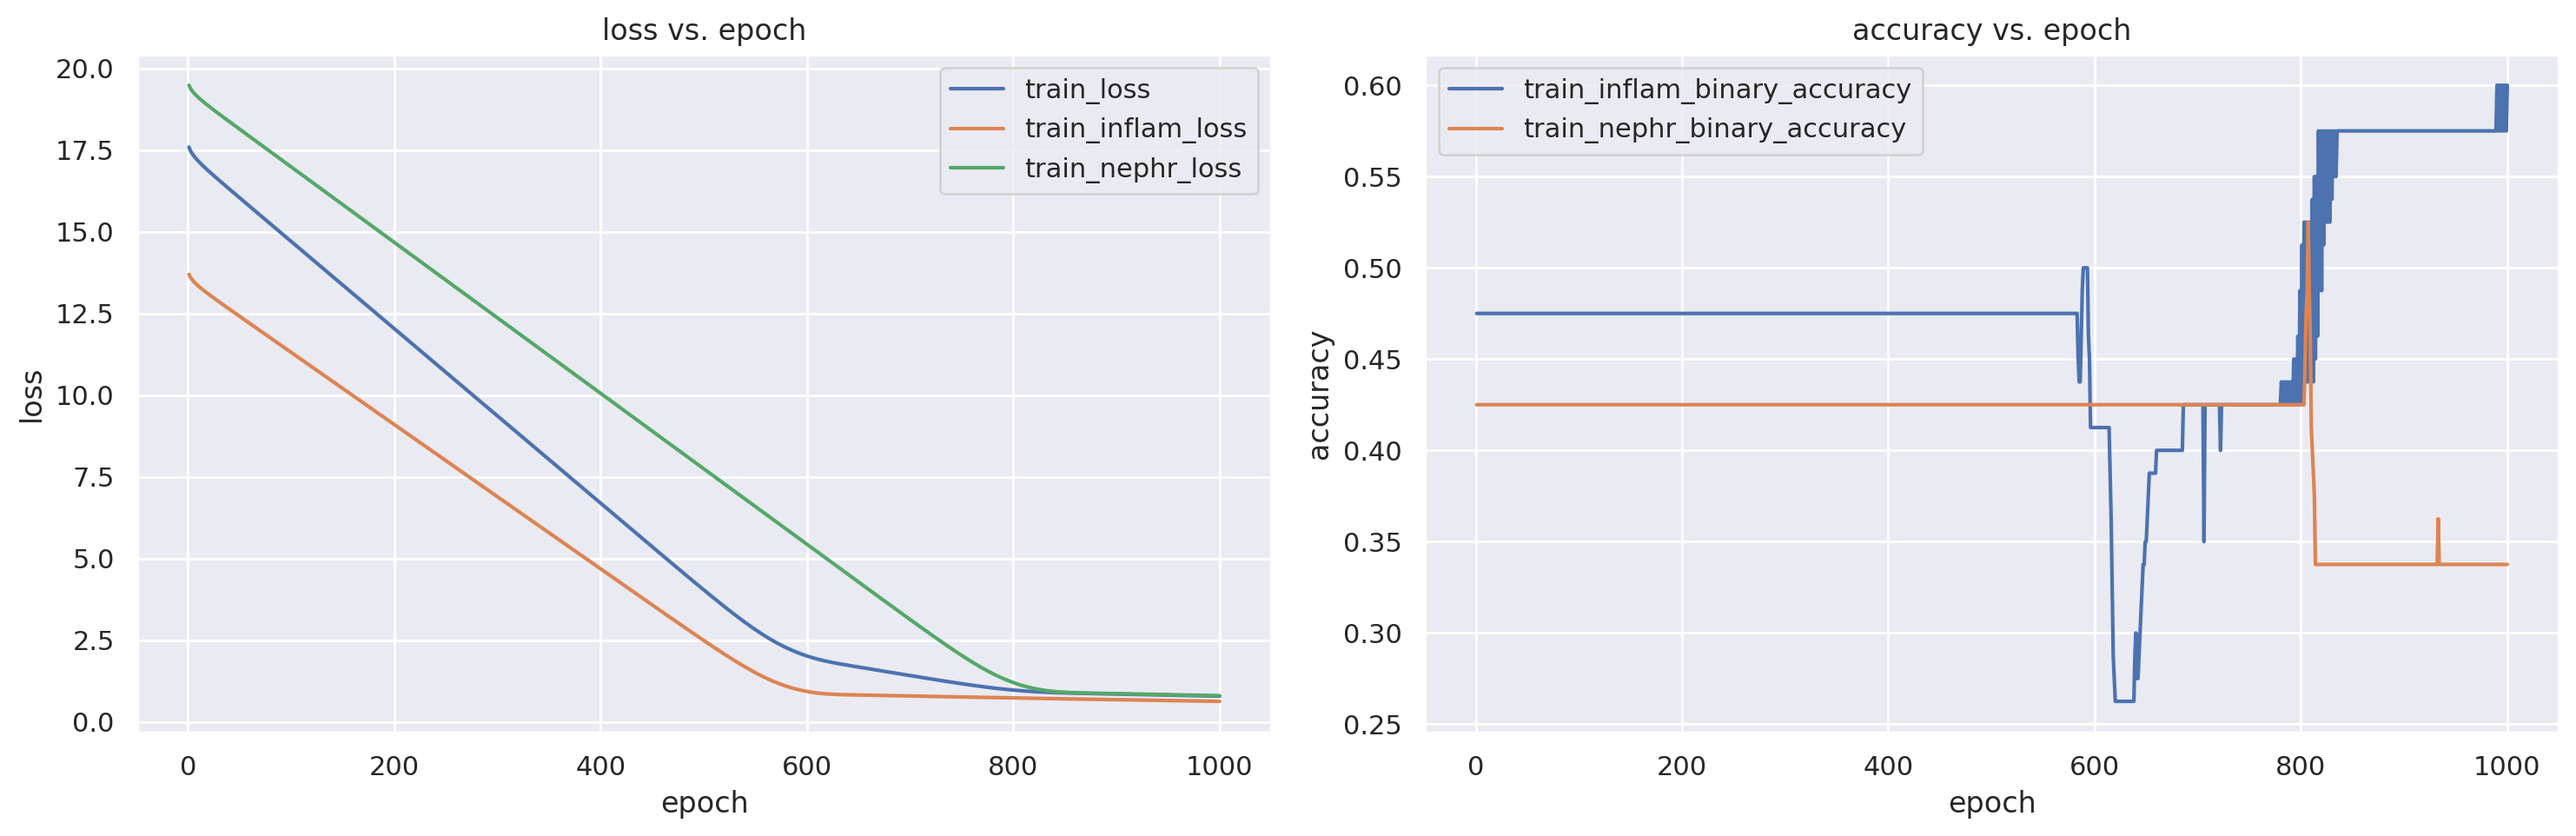

In [18]:
# Plot the training accuracy
PlotHistory(history, metrics=['loss', 'accuracy']).plot()

In [19]:
# Evaluate the model

# Define testing inputs and outputs

inputs_test = {
    "temp": temp_test, "nocc": nocc_test, "lumbp": lumbp_test,
    "up": up_test, "mict": mict_test, "bis": bis_test
}

outputs_test = {
    "inflam": inflam_test, "nephr": nephr_test
}

loss, inflam_loss, nephr_loss, inflam_acc, nephr_acc = \
    model.evaluate(inputs_test, outputs_test, verbose=0)
print(f"loss: {loss:.2f}, inflam_loss: {inflam_loss:.2f}, nephr_loss: {nephr_loss:.2f}")
print(f"inflam_acc: {inflam_acc:.2f}, nephr_acc: {nephr_acc:.2f}")

loss: 0.78, inflam_loss: 0.62, nephr_loss: 0.81
inflam_acc: 0.60, nephr_acc: 0.32


In [20]:
# Model's prediction

# Define inputs sample

X_sample = np.array([[38.8, 1., 0., 1., 0., 1.]])
X_sample = np.transpose(X_sample)
inputs_sample = {
    "temp": X_sample[0], "nocc": X_sample[1], "lumbp": X_sample[2],
    "up": X_sample[3], "mict": X_sample[4], "bis": X_sample[5]
}

inflam_pred, nephr_pred = np.squeeze(model.predict(
    inputs_sample, verbose=0))
print(f"inflam_pred: {inflam_pred:.2f}, nephr_pred: {nephr_pred:.2f}")

inflam_pred: 0.81, nephr_pred: 0.30


In [21]:
%%bash
rm -rf 'multi_input_output_model.png'

***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(4,))
])

print(model.weights)

[<tf.Variable 'dense/kernel:0' shape=(4, 1) dtype=float32, numpy=
array([[ 0.75114405],
       [-0.05059242],
       [-0.25792938],
       [-0.6872323 ]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [23]:
my_var = tf.Variable(initial_value=[-1, 2],
    dtype=tf.float32, name='my_var')
print(my_var)

my_var.assign([3.5, -1.])
x = my_var.numpy()
print(x)

<tf.Variable 'my_var:0' shape=(2,) dtype=float32, numpy=array([-1.,  2.], dtype=float32)>
[ 3.5 -1. ]


In [24]:
my_var = tf.Variable(initial_value=[-1, 2],
    dtype=tf.float32, name='my_var')
h = my_var + [5, 4]
print(h)

tf.Tensor([4. 6.], shape=(2,), dtype=float32)


In [25]:
inputs = tf.keras.Input(shape=(5,))
h = tf.keras.layers.Dense(units=16, activation='sigmoid')(inputs)
print(h)

outputs = tf.keras.layers.Dense(units=10, activation='softmax')(h)
print(outputs)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='dense_1/Sigmoid:0', description="created by layer 'dense_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_2/Softmax:0', description="created by layer 'dense_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_2/Softmax:0', description="created by layer 'dense_2'")


In [28]:
x = tf.constant(value=[[5, 2], [1, 3]])
print(x)

x_arr = x.numpy()
print(x_arr)

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)
[[5 2]
 [1 3]]


In [29]:
x = tf.ones(shape=(2, 1))
print(x)

y = tf.zeros(shape=(2, 1))
print(y)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [37]:
inputs = tf.keras.Input(shape=(16, 16, 3))
h = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
    activation='relu')(inputs)
h = tf.keras.layers.AveragePooling2D(pool_size=(3, 3))(h)
outputs = tf.keras.layers.Flatten()(h)
model = tf.keras.Model(
    inputs=inputs, outputs=outputs
)

print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 512), dtype=tf.float32, name=None), name='flatten_6/Reshape:0', description="created by layer 'flatten_6'")


#### Create Variable objects

In [40]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(initial_value=["Hello world!"], dtype=tf.string)
print(strings)
floats  = tf.Variable(initial_value=[3.14159, 2.71828], dtype=tf.float64)
print(floats)
ints = tf.Variable(initial_value=[1, 2, 3], dtype=tf.int32)
print(ints)
complexs = tf.Variable(initial_value=[25.9 - 7.39j, 1.23 - 4.91j], dtype=tf.complex128)
print(complexs)

<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'Hello world!'], dtype=object)>
<tf.Variable 'Variable:0' shape=(2,) dtype=float64, numpy=array([3.14159, 2.71828])>
<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=complex128, numpy=array([25.9 -7.39j,  1.23-4.91j])>


In [39]:
# Initialise a Variable value

tf.Variable(initial_value=tf.constant(4.2, shape=(3, 3)))

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[4.2, 4.2, 4.2],
       [4.2, 4.2, 4.2],
       [4.2, 4.2, 4.2]], dtype=float32)>

#### Use and modify Variable values

In [42]:
# Use the value of a Variable

v = tf.Variable(initial_value=0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(w)
print(type(w))

tf.Tensor(1.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [43]:
# Increment the value of a Variable

v.assign_add(1)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>


In [44]:
# Decrement the value of a Variable

v.assign_sub(1)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [45]:
# Create a constant Tensor

x = tf.constant(value=[[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [46]:
# Obtain the value as a numpy array

x.numpy()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [50]:
# Create a Tensor of type float32

x = tf.constant(value=[[1, 2, 3], [4, 5, 6], [7, 8, 9]], 
    dtype=tf.float32)
print('dtype:',x.dtype)

dtype: <dtype: 'float32'>


In [48]:
# Create coefficients

coeffs = np.arange(16)

In [49]:
# Initialise shapes

shape1 = (8, 2)
shape2 = (4, 4)
shape3 = (2, 2, 2, 2)

In [51]:
# Create Tensors of different shape

a = tf.constant(value=coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(value=coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(value=coeffs, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int64)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int64)

 c:
  tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]], shape=(2, 2, 2, 2), dtype=int64)


#### Useful Tensor operations

In [52]:
# Create a constant Tensor

t = tf.constant(value=np.arange(80), shape=(5, 2, 8))

In [53]:
# Get the rank of a Tensor

rank = tf.rank(t)

In [54]:
# Display the rank

print("rank: ", rank)

rank:  tf.Tensor(3, shape=(), dtype=int32)


In [55]:
# Reshape a Tensor

t2 =  tf.reshape(t, [8, 10])

In [56]:
# Display the new shape

print("t2.shape: ", t2.shape)

t2.shape:  (8, 10)


In [63]:
# Create ones, zeros, identity and constant Tensors

ones = tf.ones(shape=(2, 3))
zeros = tf.zeros(shape=(2, 4))
eye = tf.eye(num_rows=3, num_columns=3)
tensor7 =  tf.constant(value=7.0, shape=(2, 2))

In [64]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)


 Ones:
  tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)

 Zeros:
  tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(2, 4), dtype=float32)

 Identity:
  tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)

 Tensor filled with 7:  tf.Tensor(
[[7. 7.]
 [7. 7.]], shape=(2, 2), dtype=float32)


In [65]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [66]:
# Concatentate two Tensors

concat0 = tf.concat(values=[t1, t2], axis=0)
concat1 = tf.concat(values=[t1, t2], axis=1)

In [67]:
# Display the concatenated tensors

print(concat0)
print(concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [68]:
# Create a constant Tensor

t = tf.constant(value=np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)


 t shape:  (3, 2, 4)


In [74]:
# Expanding the rank of Tensors

t1 = tf.expand_dims(input=t, axis=0)
t2 = tf.expand_dims(input=t, axis=1)
t3 = tf.expand_dims(input=t, axis=3)

In [76]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape,
    "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After expanding dims:
 t1 shape:  (1, 3, 2, 4) 
 t2 shape:  (3, 1, 2, 4) 
 t3 shape:  (3, 2, 4, 1)


In [77]:
# Squeezing redundant dimensions

t1 = tf.squeeze(input=t1, axis=0)
t2 = tf.squeeze(input=t2, axis=1)
t3 = tf.squeeze(input=t3, axis=3)

In [78]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape,
    "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After squeezing:
 t1 shape:  (3, 2, 4) 
 t2 shape:  (3, 2, 4) 
 t3 shape:  (3, 2, 4)


In [79]:
# Slicing a Tensor

x = tf.constant(value=[1, 2, 3, 4, 5, 6, 7])

print(x[1:4])

tf.Tensor([2 3 4], shape=(3,), dtype=int32)


#### Doing maths with Tensors

In [80]:
# Create two constant Tensors

c = tf.constant(value=[[1.0, 2.0], [3.0, 4.0]])
d = tf.constant(value=[[1.0, 1.0], [0.0, 1.0]])

In [82]:
# Matrix multiplication

matmul_cd = tf.matmul(c, d)

In [83]:
# Display the result

print("\n tf.matmul(c, d):\n", matmul_cd)


 tf.matmul(c, d):
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [84]:
# Elementwise operations

c_times_d = c*d
c_plus_d = c+d
c_minus_d = c-d
c_div_c = c/c

In [85]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)


 c*d:
 tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)

 c+d:
 tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)

 c-d:
 tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)

 c/c:
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [94]:
# Create Tensors

a = tf.constant(value=[[2, 3], [3, 3]])
b = tf.constant(value=[[8, 7], [2, 3]])
x = tf.constant(value=[[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [95]:
# Absolute value of a Tensor

absx = tf.math.abs(x=x)

In [101]:
# Power of a Tensor

powab = tf.math.pow(x=a, y=b)

In [102]:
# Display the results

print("\n ", absx)
print("\n ", powab)


  tf.Tensor(
[[7.11621388]
 [3.32777704]], shape=(2, 1), dtype=float64)

  tf.Tensor(
[[ 256 2187]
 [   9   27]], shape=(2, 2), dtype=int32)


#### Randomly sampled constant tensors

In [103]:
# Create a Tensor with samples from a Normal distribution

tn = tf.random.normal(shape=(2, 2), mean=0, stddev=1.)
print(tn)

tf.Tensor(
[[ 0.3274685 -0.8426258]
 [ 0.3194337 -1.4075519]], shape=(2, 2), dtype=float32)


In [104]:
# Create a Tensor with samples from a Uniform distribution

tu = tf.random.uniform(shape=(2, 1), minval=0, maxval=10, 
    dtype='int32')
print(tu)

tf.Tensor(
[[8]
 [3]], shape=(2, 1), dtype=int32)


In [105]:
# Create a Tensor with samples from a Poisson distribution

tp = tf.random.poisson(shape=(2, 2), lam=5)
print(tp)

tf.Tensor(
[[3. 7.]
 [7. 6.]], shape=(2, 2), dtype=float32)


In [106]:
# More maths operations

d = tf.math.square(x=tn)
e = tf.math.exp(x=d)
f = tf.math.cos(x=c)

print("\n ", d)
print("\n ", e)
print("\n ", f)


  tf.Tensor(
[[0.10723563 0.7100182 ]
 [0.10203788 1.9812024 ]], shape=(2, 2), dtype=float32)

  tf.Tensor(
[[1.1131965 2.0340283]
 [1.1074255 7.2514563]], shape=(2, 2), dtype=float32)

  tf.Tensor(
[[ 0.5403023  -0.4161468 ]
 [-0.9899925  -0.65364367]], shape=(2, 2), dtype=float32)


***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [107]:
inputs = tf.keras.Input(shape=(32, 1), name='input_layer')
h = tf.keras.layers.Conv1D(filters=3, kernel_size=5,
    activation='relu', name='conv1d_layer')(inputs)
h = tf.keras.layers.AveragePooling1D(pool_size=3, name='avg_pool1d_layer')(h)
h = tf.keras.layers.Flatten(name='flatten_layer')(h)
outputs = tf.keras.layers.Dense(units=20, activation='sigmoid',
    name='dense_layer')(h)

model = tf.keras.Model(
    inputs=inputs, outputs=outputs
)

print(model.layers)

print(model.layers[1].weights)

print(model.layers[1].get_weights())

print(model.layers[1].kernel)

print(model.layers[1].bias)

print(model.get_layer('conv1d_layer').bias)

[<keras.engine.input_layer.InputLayer object at 0x7effa3a997c0>, <keras.layers.convolutional.conv1d.Conv1D object at 0x7effa3a99c70>, <keras.layers.pooling.average_pooling1d.AveragePooling1D object at 0x7effa3aac250>, <keras.layers.reshaping.flatten.Flatten object at 0x7effa3f9dd90>, <keras.layers.core.dense.Dense object at 0x7effa3f80640>]
[<tf.Variable 'conv1d_layer/kernel:0' shape=(5, 1, 3) dtype=float32, numpy=
array([[[ 0.39540076,  0.21023369, -0.3093754 ]],

       [[-0.4643173 , -0.21935523,  0.415784  ]],

       [[-0.20007089, -0.10089001, -0.3557835 ]],

       [[-0.52717376,  0.5466198 , -0.18549028]],

       [[ 0.39416623,  0.27215493,  0.07253051]]], dtype=float32)>, <tf.Variable 'conv1d_layer/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]
[array([[[ 0.39540076,  0.21023369, -0.3093754 ]],

       [[-0.4643173 , -0.21935523,  0.415784  ]],

       [[-0.20007089, -0.10089001, -0.3557835 ]],

       [[-0.52717376,  0.5466198 , -0.18549028]],



In [109]:
inputs = tf.keras.Input(shape=(32, 1), name='input_layer')
h = tf.keras.layers.Conv1D(filters=3, kernel_size=5,
    activation='relu', name='conv1d_layer')(inputs)
h = tf.keras.layers.AveragePooling1D(pool_size=3, name='avg_pool1d_layer')(h)
h = tf.keras.layers.Flatten(name='flatten_layer')(h)
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid',
    name='dense_layer')(h)

model = tf.keras.Model(
    inputs=inputs, outputs=outputs
)

print(model.get_layer('conv1d_layer').input)
print(model.get_layer('conv1d_layer').output)

# flatten_output = model.layers[3].output
flatten_output = model.get_layer('flatten_layer').output

# model2 = Model(inputs=model.input, outputs=flatten_output)

# model3 = tf.keras.Sequential([
#     model2,
#     tf.keras.layers.Dense(units=10, activation='softmax',
#         name='new_dense_layer')
# ])

# new_outputs = tf.keras.layers.Dense(units=10,
    # activation='softmax')(model2.output)
# model3 = Model(inputs=model2.input, outputs=new_outputs)

new_outputs = tf.keras.layers.Dense(units=10,
    activation='softmax')(flatten_output)
model3 = tf.keras.Model(inputs=model.input, outputs=new_outputs)

print(model3.summary())

KerasTensor(type_spec=TensorSpec(shape=(None, 32, 1), dtype=tf.float32, name='input_layer'), name='input_layer', description="created by layer 'input_layer'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 3), dtype=tf.float32, name=None), name='conv1d_layer/Relu:0', description="created by layer 'conv1d_layer'")
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 1)]           0         
                                                                 
 conv1d_layer (Conv1D)       (None, 28, 3)             18        
                                                                 
 avg_pool1d_layer (AveragePo  (None, 9, 3)             0         
 oling1D)                                                        
                                                                 
 flatten_layer (Flatten)     (None, 27)                0         
    

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [ ]:
from tensorflow.keras.applications import VGG19

os.makedirs("./models", exist_ok=True)
vgg_model = VGG19()
vgg_model.save("./models/Vgg19.h5")
del vgg_model

In [ ]:
# Load the VGG19 model

from tensorflow.keras.models import load_model
vgg_model = load_model("./models/Vgg19.h5")

In [ ]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

#### Build a model to access the layer outputs

In [ ]:
# Build a model that returns the layer outputs
from tensorflow.keras.models import Model

layer_outputs = [layer.output for layer in vgg_layers]
features = Model(inputs=vgg_input, outputs=layer_outputs)

In [ ]:
# Plot the model

tf.keras.utils.plot_model(features, 'vgg19_model.png', 
    show_shapes=True)

In [ ]:
# Test the model on a random input

img = np.random.random((1, 224, 224, 3)).astype('float32')
extracted_features = features(img)
extracted_features[0].shape

#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

In [ ]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open("./data/cool_cat.jpg"))

#### Visualise network features from the input image

In [ ]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = "./data/cool_cat.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
# Extract the features

extracted_features = features(x)

In [ ]:
# Visualise the input channels

f1 = extracted_features[0]
print("\n f1.shape:", f1.shape)

imgs = f1[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(3):
    ax = plt.subplot(1, 3, n+1)
    plt.imshow(imgs[:, :, n], cmap='viridis')
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()

In [ ]:
# Visualise some features in the first hidden layer

f2 = extracted_features[1]
print("\n f2.shape:", f2.shape)

imgs = f2[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[:, :, n], cmap='viridis')
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()

In [ ]:
# Build a model to extract features by layer name

extracted_features_block1_pool = Model(inputs=features.input,
    outputs=features.get_layer('block1_pool').output)
block1_pool_features = extracted_features_block1_pool.predict(x)

In [ ]:
# Visualise some features from the extracted layer output

imgs = block1_pool_features[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[:, :, n], cmap='viridis')
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()

In [ ]:
# Extract features from a layer deeper in the network

extracted_features_block5_conv4 = Model(inputs=features.input,
    outputs=features.get_layer('block5_conv4').output)
block5_conv4_features = extracted_features_block5_conv4.predict(x)

In [ ]:
# Visualise some features from the extracted layer output

imgs = block5_conv4_features[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[:, :, n], cmap='viridis')
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()

***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D

inputs = Input(shape=(8, 8, 1), name='input_layer')
h = Conv2D(16, 3, activation='relu', name='conv2d_layer', trainable=False)(inputs)
h = MaxPooling2D(3, name='max_pool2d_layer')(h)
h = Flatten(name='flatten_layer')(h)
outputs = Dense(10, activation='softmax', name='softmax_layer')(h)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D

inputs = Input(shape=(8, 8, 1), name='input_layer')
h = Conv2D(16, 3, activation='relu', name='conv2d_layer')(inputs)
h = MaxPooling2D(3, name='max_pool2d_layer')(h)
h = Flatten(name='flatten_layer')(h)
outputs = Dense(10, activation='softmax', name='softmax_layer')(h)

model = Model(inputs=inputs, outputs=outputs)

model.get_layer('conv2d_layer').trainable = False

model.compile(loss='sparse_categorical_crossentropy')

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D

model = load_model('my_pretrained_model')

model.trainable = False

flatten_output = model.get_layer('flatten_layer').output
new_outputs = Dense(5, activation='softmax', name='new_softmax_layer')(flatten_output)

new_model = Model(inputs=model.input, outputs=new_outputs)

new_model.compile(loss='sparse_categorical_crossentropy')
new_model.fit(X_train, y_train, epochs=10)

#### Build the model

In [ ]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', 
        kernel_initializer='random_uniform', bias_initializer='ones'),
    layers.Dense(2, activation='relu', 
        kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax')
])

In [ ]:
# Display the model summary

model.summary()

#### Examine the weight matrix variation over training

In [ ]:
def get_weights(model):
    return [e.weights[0].numpy() for e in model.layers]

def get_biases(model):
    return [e.bias.numpy() for e in model.layers]

def plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers):
    plt.figure(figsize=(8, 8))
    for n in range(3):
        delta_l = W1_layers[n] - W0_layers[n]
        print('Layer ' + str(n) + ': bias variation: ', 
            np.linalg.norm(b1_layers[n] - b0_layers[n]))
        ax = plt.subplot(1, 3, n+1)
        plt.imshow(delta_l, cmap='viridis')
        plt.title('Layer '+ str(n))
        plt.axis('off')
    plt.colorbar()
    plt.suptitle('Weight matrices variation')
    plt.show()

In [ ]:
# Retrieve the weights and biases

W0_layers = get_weights(model)
b0_layers = get_biases(model)

In [ ]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
    loss='mse', metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases

W1_layers = get_weights(model)
b1_layers = get_biases(model)

In [ ]:
# Plot the variation

plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers)

#### Freeze layers at build time

In [ ]:
# Count the trainable and non trainable variables before the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [ ]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
    "\n\t Number of non trainable variables: ", n_non_trainable_variables)

In [ ]:
# Build the model

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', 
        kernel_initializer='random_uniform', bias_initializer='ones',
        trainable=False),
    layers.Dense(2, activation='relu', 
        kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax')
])

In [ ]:
# Count the trainable and non trainable variables after the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [ ]:
# Display the number of trainable and non trainable variables after 
# the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
    "\n\t Number of non trainable variables: ", n_non_trainable_variables)

In [ ]:
# Retrieve weights and biases

W0_layers = get_weights(model)
b0_layers = get_biases(model)

In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
    loss='mse', metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases

W1_layers = get_weights(model)
b1_layers = get_biases(model)

In [ ]:
# Plot the variation

plot_delta_weights(W0_layers, W1_layers, b0_layers, b1_layers)

#### Freeze layers of a pre-built model

In [ ]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", 
    len(model.trainable_variables), "\n\t Number of non trainable variables: ", 
    len(model.non_trainable_variables))

In [ ]:
# Freeze the second layer

model.layers[1].trainable = False

In [ ]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", 
    len(model.trainable_variables), "\n\t Number of non trainable variables: ", 
    len(model.non_trainable_variables))

In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
    loss='mse', metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases

W2_layers = get_weights(model)
b2_layers = get_biases(model)

In [ ]:
# Plot the variation

plot_delta_weights(W1_layers, W2_layers, b1_layers, b2_layers)